**predict_proba메소드**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}'.format(accuracy))
    print('정밀도 : {0:.3f}'.format(precision))
    print('재현율 : {0:.3f}'.format(recall))

In [8]:
from sklearn.preprocessing import LabelEncoder

# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Fare'].fillna(0,inplace=True)
    df.fillna('N', inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis =1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [9]:
from sklearn.linear_model import LogisticRegression

#데이터 로딩
titanic_df = pd.read_csv('./data/titanic_train.csv')

# 결정값
y_titanic_df = titanic_df['Survived']
# 학습 데이터 셋
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = \
train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test, lr_pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849
정밀도 : 0.774
재현율 : 0.787


C:\Users\j\anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:10]

array([[0.46198241, 0.53801759],
       [0.87863883, 0.12136117],
       [0.87716256, 0.12283744],
       [0.88266765, 0.11733235],
       [0.85534206, 0.14465794],
       [0.88224043, 0.11775957],
       [0.88839194, 0.11160806],
       [0.20879521, 0.79120479],
       [0.78287265, 0.21712735],
       [0.36921677, 0.63078323]])

In [12]:
pred=lr_clf.predict(X_test)

In [14]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
pred_proba_result[:10]

array([[0.46198241, 0.53801759, 1.        ],
       [0.87863883, 0.12136117, 0.        ],
       [0.87716256, 0.12283744, 0.        ],
       [0.88266765, 0.11733235, 0.        ],
       [0.85534206, 0.14465794, 0.        ],
       [0.88224043, 0.11775957, 0.        ],
       [0.88839194, 0.11160806, 0.        ],
       [0.20879521, 0.79120479, 1.        ],
       [0.78287265, 0.21712735, 0.        ],
       [0.36921677, 0.63078323, 1.        ]])

## Binarizer 클래스
- threshold 변수를 특정 값으로 설정하고
- Binarizer 클래스의 fit_transform 메서드를 이용해서
- 넘파이 ndarray 입력 값을 지정된 threshold보다 같거나 작으면 0값
- 크면 1값으로 변환해서 반환

In [15]:
from sklearn.preprocessing import Binarizer
X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

binarizer = Binarizer(threshold = 1.5)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


In [16]:
from sklearn.preprocessing import Binarizer

c_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold = c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849
정밀도 : 0.774
재현율 : 0.787


In [17]:
c_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

bina = Binarizer(threshold = c_threshold).fit(pred_proba_1)
custom_predict = bina.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.832
정밀도 : 0.718
재현율 : 0.836


In [19]:
# 여러개의 분류 결정 임계값을 변경 하면서 binarizer를 예측
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)        
        

임계값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.832
정밀도 : 0.718
재현율 : 0.836
임계값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849
정밀도 : 0.766
재현율 : 0.803
임계값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849
정밀도 : 0.774
재현율 : 0.787
임계값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.866
정밀도 : 0.836
재현율 : 0.754
임계값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877
정밀도 : 0.882
재현율 : 0.738


In [20]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)

print('임계값 shape : ', thresholds.shape)
print('정밀도 shape : ', precisions.shape)
print('재현율 shape : ', recalls.shape)

idx = np.arange(0, thresholds.shape[0], 15)
print('sample index : ', idx)
print('임계값 sample : ', np.round(thresholds[idx],3))
print('정밀도 sample : ', np.round(precisions[idx],3))
print('재현율 sample : ', np.round(recalls[idx],3))



임계값 shape :  (143,)
정밀도 shape :  (144,)
재현율 shape :  (144,)
sample index :  [  0  15  30  45  60  75  90 105 120 135]
임계값 sample :  [0.104 0.121 0.14  0.186 0.281 0.404 0.564 0.667 0.822 0.947]
정밀도 sample :  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
재현율 sample :  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


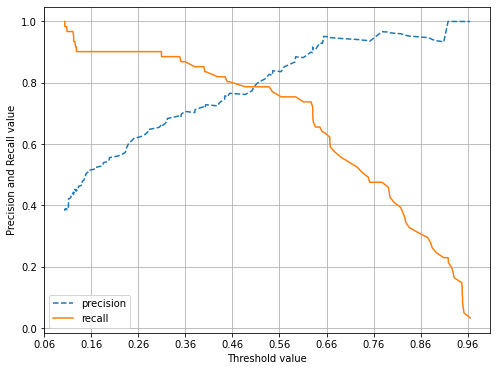

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tiker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value') ; plt.ylabel('Precision and Recall value')
    plt.legend() ; plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

F1 스코어 확인

In [22]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f1)

0.7804878048780488


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, f1_score

# 오차행렬 함수 수정
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.3f}'.format(accuracy))
    print('정밀도 : {0:.3f}'.format(precision))
    print('재현율 : {0:.3f}'.format(recall))
    print('F1 : {0:.3f}'.format(f1))

In [24]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.832
정밀도 : 0.718
재현율 : 0.836
F1 : 0.773
임계값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.849
정밀도 : 0.766
재현율 : 0.803
F1 : 0.784
임계값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.849
정밀도 : 0.774
재현율 : 0.787
F1 : 0.780
임계값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.866
정밀도 : 0.836
재현율 : 0.754
F1 : 0.793
임계값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.877
정밀도 : 0.882
재현율 : 0.738
F1 : 0.804


## G measuer
- 정밀도와 재현율의 기하평균

## ROC Curve 와 AUC
### ROC
- 수신자 판단 곡선
- 의학분야에 많이 사용
- ML의 이진 분류 모델의 예측 성능의 중요 평가지표

In [26]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index : ', thr_index)
print('샘플용 임곗값 : ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 FPR : ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 임곗값 :  [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR :  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 FPR :  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]
